<a href="https://colab.research.google.com/github/Bovi-analytics/Salamone-et-al-2025/blob/main/EatingTime_DaysInMilk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistical notebook for eating time DaysInMilk

## Importing of google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## R loading

In [ ]:
%reload_ext rpy2.ipython

In [ ]:
%%R
lib_loc <- "/content/drive/Shareddrives/Bovi-Analytics/R-lib/"

In [ ]:
%%R
.packages <- c("ggplot2",
                  "readr",
                  "plyr",
                  "dplyr",
                  "tidyr",
                  "tibble",
                  "lme4",
                  "lmerTest",
                  "multcompView",
                  "mvtnorm",
                  "TH.data",
                  "multcomp",
                  "emmeans",
                  "lsmeans",
                  "carData",
                  "car",
                  "stringr",
                  "cAIC4",
                  "ggrepel",
                  "geomtextpath",
                  "grid",
                  "sandwich",
                  "clubSandwich",
                  "skimr",
                  "purrr",
                  'cowplot',
                  "ggpubr"
                  )

# Install CRAN packages (if not already installed)
.inst <- .packages %in% installed.packages(lib.loc=lib_loc)
if(length(.packages[!.inst]) > 0) install.packages(.packages[!.inst], lib=lib_loc, repos = "http://cran.us.r-project.org")

# Load packages into session
lapply(.packages, require, character.only=TRUE, lib.loc = lib_loc, quietly = TRUE)

Attaching package: ‘dplyr’



    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize



    filter, lag



    intersect, setdiff, setequal, union


Attaching package: ‘Matrix’



    expand, pack, unpack


Attaching package: ‘lmerTest’



    lmer



    step


Attaching package: ‘MASS’



    select


Attaching package: ‘TH.data’



    geyser


Caution: You lose important information if you filter this package's results.
See '? untidy'

Users are encouraged to switch the rest of the way.
See help('transition') for more information, including how to
convert old 'lsmeans' objects and scripts to work with 'emmeans'.

Attaching package: ‘car’



    recode


Attaching package: ‘nlme’



    lmList



    collapse


  method    from    
  bread.mlm sandwich

Attaching package: ‘purrr’



    some



    compact


Attaching package: ‘ggpubr’



    get_legend



    mutate




[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

[[11]]
[1] TRUE

[[12]]
[1] TRUE

[[13]]
[1] TRUE

[[14]]
[1] TRUE

[[15]]
[1] TRUE

[[16]]
[1] TRUE

[[17]]
[1] TRUE

[[18]]
[1] TRUE

[[19]]
[1] TRUE

[[20]]
[1] TRUE

[[21]]
[1] TRUE

[[22]]
[1] TRUE

[[23]]
[1] TRUE

[[24]]
[1] TRUE

[[25]]
[1] TRUE

[[26]]
[1] TRUE

[[27]]
[1] TRUE



## Data loading into dataframe

In [ ]:
%%R
MrtData <-
  readr::read_csv(
      "/content/drive/Shareddrives/Bovi-Analytics/Projects/CelienKemel/NextMilkPredictions.csv",
      col_types = readr::cols(
          HerdId = readr::col_character(),
          AnimalId = readr::col_character()
          )
   ) %>%
  dplyr::filter(AmountMPRNext > 0.0) %>%
  dplyr::filter(DimMPRNext < 45) %>% #HIER FILTER TOEVOEGEN ANDERE MODELLEN
  dplyr::filter(DimMPRNext > 5) %>% # HIER OOK
  dplyr::mutate(
      AnimalIdentifier = factor(AnimalId),
      CalvingDate = CalvingDateNext,
      MRT = AmountMPRNext - prediction,
      LactationNumber = lactationNumber + 1,
      HerdIdentifier = factor(case_when(
          HerdId == "287359"  ~ "3",
          HerdId == "269621" ~ "2746",
          HerdId == "6177195" ~ "2514",
          HerdId == "410638" ~ "3314",
          HerdId == "2209799" ~ "544",
          HerdId == "196062" ~ "700",
          HerdId == "325565" ~ "2011",
          HerdId == "207456" ~ "2297",
          TRUE ~  "UnknownUBN"
      )))%>%
      group_by(HerdId) %>%
      mutate( MRTQuantile = case_when(
          MRT < quantile(MRT, probs= 0.33) ~ "LOW MRT",
          MRT <= quantile(MRT, probs= 0.66) ~ "MED MRT",
          MRT > quantile(MRT, probs= 0.66) ~ "HIGH MRT",
          TRUE ~"Missing")
      ) %>%  ungroup() %>%
      dplyr::select(
      "AnimalIdentifier",
      "HerdIdentifier",
      #"LactationNumber",
      "CalvingDate",
      "MRT",
      "MRTQuantile",
      "AmountMPRNext"
  )




In [ ]:
%%R
group.colors<-c("LOW MRT"="#FF0090", "HIGH MRT"="#ffa500", "MED MRT"="#3891A6")
Visualisation = MrtData %>% filter(MRTQuantile == "LOW MRT")
A = ggplot(Visualisation,aes(x=AmountMPRNext, y = MRT, colour = MRTQuantile))+
geom_hline(yintercept=0, color= "black", size=1)+
geom_point(position = "jitter") +
  ylim(-40, 40) + xlim(10,80) +
  theme_bw() +
  guides(colour = guide_legend(override.aes = list(size=12)))+
  theme(text = element_text(family = "Times New Roman"),plot.margin = unit(c(1,0,1,0), "lines")) +
  theme(text=element_text(size=25),
        legend.title = element_blank(),
        plot.title = element_text(hjust = 0.5),
        panel.border = element_blank(),
        axis.title.x=element_blank(),
        axis.title.y=element_blank(),
        panel.grid.minor = element_blank(),
        axis.line = element_line(colour = "black"))+
        labs(
        y="MRT" ,
        x = "Milk production first test day") +
        scale_color_manual(values=group.colors)+
    theme (legend.position= "none")
Visualisation = MrtData %>% filter(MRTQuantile == "MED MRT")
B = ggplot(Visualisation,aes(x=AmountMPRNext, y = MRT, colour = MRTQuantile))+
geom_hline(yintercept=0, color= "black", size=1)+
geom_point(position = "jitter") +
  ylim(-40, 40) + xlim(10,80) +
  geom_vline(xintercept = 11.5)+
  theme_bw() +
  guides(y = "none",colour = guide_legend(override.aes = list(size=12)))+
  theme(text = element_text(family = "Times New Roman"),plot.margin = unit(c(1,0,1,0), "lines")) +
  theme(text=element_text(size=25),
        legend.title = element_blank(),
        plot.title = element_text(hjust = 0.5),
        panel.border = element_blank(),
        panel.grid.minor = element_blank(),
        axis.title.x=element_blank(),
        axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank(),
        axis.line = element_line(colour = "black"))+
        scale_color_manual(values=group.colors)+
    theme (legend.position= "none")

Visualisation = MrtData %>% filter(MRTQuantile == "HIGH MRT")
C= ggplot(Visualisation,aes(x=AmountMPRNext, y = MRT, colour = MRTQuantile))+
geom_hline(yintercept=0, color= "black", size=1)+
geom_point(position = "jitter") +
  ylim(-40, 40) + xlim(10,80) +
  geom_vline(xintercept = 11.5)+
  theme_bw() +
  guides(y = "none",colour = guide_legend(override.aes = list(size=12)))+
  theme(text = element_text(family = "Times New Roman"),plot.margin = unit(c(1,0,1,0), "lines")) +
  theme(text=element_text(size=25),
        legend.title = element_blank(),
        plot.title = element_text(hjust = 0.5),
        panel.border = element_blank(),
        panel.grid.minor = element_blank(),
        axis.title.x=element_blank(),
        axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank(),
        axis.line = element_line(colour = "black")) +
        scale_color_manual(values=group.colors)+
    theme (legend.position= "none")



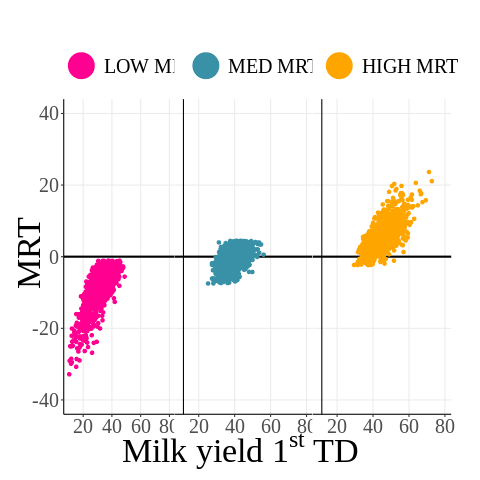

In [ ]:
%%R

 ggarrange(A, B, C, ncol = 3,
          widths = c(1,0.95,0.95) ,
          heights = c(12,12,12),
          nrow = 1, align = "h",legend = "top")+
                annotate(
                    geom="text",
                    x= 0,
                    y= 0.47,
                    label = "MRT",
                    angle = 90,
                    family = "Times New Roman",
                    size = 12)+
                annotate(
                    geom="text",
                    x= 0.5,
                    y= 0,
                    label = expression("Milk yield 1"^"st"*" TD"),
                    family = "Times New Roman",
                    size = 12)+
                    guides(y = "none",x="none") + theme(axis.line = element_blank(),panel.grid.minor = element_blank(),panel.grid.mayor = element_blank())+
                    #theme_bw() +
                    theme(plot.margin = unit(c(2,2,2,2),"lines"),
                    legend.text=element_text(size=12),
                    panel.border = element_blank(),
                    panel.background=element_rect(fill = "white",color= "white"))



In [ ]:
%%R
ggsave("/content/drive/Shareddrives/Bovi-Analytics/Projects/CelienKemel/Figures/VisualisationMRTData.png", width = 15, height = 6)

In [ ]:
%%R
MrtData %>%
group_by(HerdIdentifier)%>%
skim()

── Data Summary ────────────────────────
                           Values        
Name                       Piped data    
Number of rows             5353          
Number of columns          6             
_______________________                  
Column type frequency:                   
  character                1             
  factor                   1             
  numeric                  2             
  POSIXct                  1             
________________________                 
Group variables            HerdIdentifier

── Variable type: character ────────────────────────────────────────────────────
  skim_variable HerdIdentifier n_missing complete_rate min max empty n_unique
1 MRTQuantile   2011                   0             1   7   8     0        3
2 MRTQuantile   2297                   0             1   7   8     0        3
3 MRTQuantile   2514                   0             1   7   8     0        3
4 MRTQuantile   2746                   0             1   7   

In [ ]:
%%R
MrtData %>%
group_by(MRTQuantile)%>%
dplyr::summarise(Mean=mean(AmountMPRNext, na.RM=TRUE))

# A tibble: 3 × 2
  MRTQuantile  Mean
  <chr>       <dbl>
1 HIGH MRT     44.8
2 LOW MRT      31.9
3 MED MRT      38.9


In [ ]:
%%R
MrtData %>%
group_by(MRTQuantile)%>%
dplyr::summarise(sd=sd(AmountMPRNext))

# A tibble: 3 × 2
  MRTQuantile    sd
  <chr>       <dbl>
1 HIGH MRT     5.76
2 LOW MRT      6.28
3 MED MRT      4.65


In [ ]:
%%R
MrtData %>%
group_by(MRTQuantile)%>%
dplyr::summarise(Mean=mean(MRT, na.RM=TRUE))

# A tibble: 3 × 2
  MRTQuantile   Mean
  <chr>        <dbl>
1 HIGH MRT     5.53 
2 LOW MRT     -7.96 
3 MED MRT     -0.593


In [ ]:
%%R
MrtData %>%
group_by(MRTQuantile)%>%
dplyr::summarise(sd=sd(MRT))

# A tibble: 3 × 2
  MRTQuantile    sd
  <chr>       <dbl>
1 HIGH MRT     3.60
2 LOW MRT      5.04
3 MED MRT      2.08


In [ ]:
%%R
BehaviorData <-
  readr::read_csv("/content/drive/Shareddrives/Bovi-Analytics/Projects/SenseOfSensors/CsvData/SensorAndCalvingDataRepartitioned08032021/ObservationType=EatingTimeMinutesPerDay/part-00000-tid-3815821870089910923-ec384d9a-727d-46aa-970e-588ecba307c7-410-6.c000.csv",
    col_types = readr::cols(HerdIdentifier = readr::col_character(),
        TransitionLactationNumber = readr::col_integer(),
        TransitionParity = readr::col_character(),
        TransitionMonthsInMilk = readr::col_integer(),
        TransitionDaysInMilk = readr::col_integer(),
        TransitionCalvingDate = readr::col_character(),
        ##Hour = readr::col_integer(),
        Observations = readr::col_integer())) %>%
  dplyr::filter(dplyr::between(TransitionDaysInMilk, -21, 21)) %>%
  dplyr::filter(TransitionDaysInMilk != 0 ) %>%
  dplyr::mutate(
    CalvingDate = as.Date (TransitionCalvingDate),
    AnimalIdentifier = factor(str_replace_all(TransitionAnimalEartag, "[^0-9.]", "")),
    HerdIdentifier = factor(HerdIdentifier),
    LactationIdentifier = factor(paste(AnimalIdentifier,CalvingDate,sep="-")),
    Parity = factor(TransitionParity),
    LactationNumber = factor(TransitionLactationNumber),
    MonthsInMilk = factor(TransitionMonthsInMilk),
    DaysInMilk = factor(TransitionDaysInMilk),
    numMonthsInMilk = TransitionMonthsInMilk,
    numDaysInMilk = TransitionDaysInMilk,
    CalvingSeason = factor(TransitionSeason),
    ##Hour = factor(Hour),
    SensorValue = ObservationValue,
    MilkingType = factor(case_when(
    HerdIdentifier %in% c("544", "2514", "3314")~"AMS",
    TRUE~"CMS")),
    CalvingGroup = factor(case_when(
          TransitionDaysInMilk <= -1 ~ "PreCalving",
          TransitionDaysInMilk >= 1 ~ "PostCalving",
          TRUE ~ "Missing"))) %>%
   dplyr::select(
      AnimalIdentifier,
      HerdIdentifier,
      LactationIdentifier,
      Parity,
      MonthsInMilk,
      DaysInMilk,
      CalvingGroup,
      numMonthsInMilk,
      numDaysInMilk,
      CalvingSeason,
      CalvingDate,
      ##Hour,
      SensorValue,
      MilkingType,
      LactationNumber
      ) %>%
  tidyr::drop_na()

In [ ]:
%%R
AnalysisData <- BehaviorData %>%
  dplyr::inner_join(
      MrtData,
      by = c("HerdIdentifier", "AnimalIdentifier", "CalvingDate")
  )


In [ ]:
%%R
AnalysisData %>%
group_by(CalvingGroup)%>%
dplyr::summarise(Mean=mean(SensorValue, na.RM=TRUE), sd=sd(SensorValue))

# A tibble: 2 × 3
  CalvingGroup  Mean    sd
  <fct>        <dbl> <dbl>
1 PostCalving   303.  97.3
2 PreCalving    312.  99.3


In [ ]:
%%R
head(AnalysisData)

# A tibble: 6 × 17
  AnimalIdentifier HerdIdentifier LactationIdentifier  Parity MonthsInMilk
  <fct>            <fct>          <fct>                <fct>  <fct>       
1 875084730        2011           875084730-2016-09-26 2      1           
2 875084730        2011           875084730-2016-09-26 2      1           
3 875084730        2011           875084730-2016-09-26 2      1           
4 875084730        2011           875084730-2016-09-26 2      1           
5 758616911        2297           758616911-2017-04-09 2      0           
6 758616911        2297           758616911-2017-04-09 2      0           
# ℹ 12 more variables: DaysInMilk <fct>, CalvingGroup <fct>,
#   numMonthsInMilk <int>, numDaysInMilk <int>, CalvingSeason <fct>,
#   CalvingDate <dttm>, SensorValue <dbl>, MilkingType <fct>,
#   LactationNumber <fct>, MRT <dbl>, MRTQuantile <chr>, AmountMPRNext <dbl>


In [ ]:
%%R
AnalysisData$MRTQuantile = factor(AnalysisData$MRTQuantile)
AnalysisData$MRTQuantile = relevel(AnalysisData$MRTQuantile,ref = "LOW MRT")

In [ ]:
%%R
str(AnalysisData)

tibble [86,178 × 17] (S3: tbl_df/tbl/data.frame)
 $ AnimalIdentifier   : Factor w/ 2623 levels "0359563346","0359563389",..: 1404 1404 1404 1404 1179 1179 1179 1179 1179 1179 ...
 $ HerdIdentifier     : Factor w/ 9 levels "2011","2297",..: 1 1 1 1 2 2 2 2 2 2 ...
 $ LactationIdentifier: Factor w/ 4368 levels "0359563346-2020-03-28",..: 2797 2797 2797 2797 2281 2281 2281 2281 2281 2281 ...
 $ Parity             : Factor w/ 3 levels "1","2","3+": 2 2 2 2 2 2 2 2 2 2 ...
 $ MonthsInMilk       : Factor w/ 2 levels "0","1": 2 2 2 2 1 1 1 1 1 1 ...
 $ DaysInMilk         : Factor w/ 42 levels "-21","-20","-19",..: 26 27 32 34 1 2 8 10 13 14 ...
 $ CalvingGroup       : Factor w/ 2 levels "PostCalving",..: 1 1 1 1 2 2 2 2 2 2 ...
 $ numMonthsInMilk    : int [1:86178] 1 1 1 1 0 0 0 0 0 0 ...
 $ numDaysInMilk      : int [1:86178] 5 6 11 13 -21 -20 -14 -12 -9 -8 ...
 $ CalvingSeason      : Factor w/ 4 levels "Autumn","Spring",..: 1 1 1 1 2 2 2 2 2 2 ...
 $ CalvingDate        : POSIXct[1:86178], fo

## Descriptive statistics

In [ ]:
%%R
# Total Lactation Per Parity
AnalysisData %>%
  group_by(Parity) %>%
  summarise(Unique_Elements = n_distinct(AnimalIdentifier,CalvingDate))

# A tibble: 2 × 2
  Parity Unique_Elements
  <fct>            <int>
1 2                  709
2 3+                1571


In [ ]:
%%R
# Total Number Animals
AnalysisData %>%
summarise(Unique_Elements = n_distinct(AnimalIdentifier))

# A tibble: 1 × 1
  Unique_Elements
            <int>
1            1314


In [ ]:
%%R
# Number of Animals per Lactation
AnalysisData %>%
  group_by(LactationNumber)%>%
  summarise(Unique_Elements = n_distinct(AnimalIdentifier, CalvingDate, Parity))

# A tibble: 10 × 2
   LactationNumber Unique_Elements
   <fct>                     <int>
 1 2                           709
 2 3                           624
 3 4                           430
 4 5                           269
 5 6                           142
 6 7                            56
 7 8                            27
 8 9                            14
 9 10                            8
10 11                            1


# Model building

##Multivariable models


In [ ]:
%%R
Model2.0 <- lme4::lmer(
                  SensorValue ~
                  Parity + DaysInMilk + CalvingSeason + HerdIdentifier +  MRTQuantile +
                  (1 + numDaysInMilk|LactationIdentifier),
                  REML = FALSE,
                  data = AnalysisData
                  )

In [ ]:
%%R
drop1(Model2.0,test="Chisq")

Single term deletions

Model:
SensorValue ~ Parity + DaysInMilk + CalvingSeason + HerdIdentifier + 
    MRTQuantile + (1 + numDaysInMilk | LactationIdentifier)
               npar    AIC     LRT   Pr(Chi)    
<none>              966157                      
Parity            1 966491  335.65 < 2.2e-16 ***
DaysInMilk       41 967224 1149.03 < 2.2e-16 ***
CalvingSeason     3 966173   21.72 7.469e-05 ***
HerdIdentifier    6 966379  233.50 < 2.2e-16 ***
MRTQuantile       2 966161    8.15   0.01703 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


## Introduction of interactions

### Interactions with DaysInMilk

In [ ]:
%%R
Model2.1 <- lme4::lmer(
                  SensorValue ~
                  DaysInMilk*Parity + CalvingSeason + MRTQuantile + HerdIdentifier+
                 (1 + numDaysInMilk|LactationIdentifier),
                  REML = FALSE,
                  data = AnalysisData
                  )
anova(Model2.0,Model2.1,test="Chisq")

Data: AnalysisData
Models:
Model2.0: SensorValue ~ Parity + DaysInMilk + CalvingSeason + HerdIdentifier + MRTQuantile + (1 + numDaysInMilk | LactationIdentifier)
Model2.1: SensorValue ~ DaysInMilk * Parity + CalvingSeason + MRTQuantile + HerdIdentifier + (1 + numDaysInMilk | LactationIdentifier)
         npar    AIC    BIC  logLik deviance  Chisq Df Pr(>Chisq)    
Model2.0   58 966157 966700 -483021   966041                         
Model2.1   99 966061 966988 -482931   965863 178.52 41  < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
%%R
Model2.2 <- lme4::lmer(
                  SensorValue ~
                  DaysInMilk*HerdIdentifier + CalvingSeason + Parity + MRTQuantile +
                  (1 + numDaysInMilk| LactationIdentifier),
                  REML = FALSE,
                  data = AnalysisData
                  )
anova(Model2.0,Model2.2,test="Chisq")

Data: AnalysisData
Models:
Model2.0: SensorValue ~ Parity + DaysInMilk + CalvingSeason + HerdIdentifier + MRTQuantile + (1 + numDaysInMilk | LactationIdentifier)
Model2.2: SensorValue ~ DaysInMilk * HerdIdentifier + CalvingSeason + Parity + MRTQuantile + (1 + numDaysInMilk | LactationIdentifier)
         npar    AIC    BIC  logLik deviance Chisq  Df Pr(>Chisq)    
Model2.0   58 966157 966700 -483021   966041                         
Model2.2  304 964698 967545 -482045   964090  1951 246  < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
%%R
Model2.3 <- lme4::lmer(
                  SensorValue ~
                  DaysInMilk*CalvingSeason + Parity + HerdIdentifier + MRTQuantile +
                  (1 + numDaysInMilk| LactationIdentifier),
                  REML = FALSE,
                  data = AnalysisData
                  )
anova(Model2.0,Model2.3,test="Chisq")

Data: AnalysisData
Models:
Model2.0: SensorValue ~ Parity + DaysInMilk + CalvingSeason + HerdIdentifier + MRTQuantile + (1 + numDaysInMilk | LactationIdentifier)
Model2.3: SensorValue ~ DaysInMilk * CalvingSeason + Parity + HerdIdentifier + MRTQuantile + (1 + numDaysInMilk | LactationIdentifier)
         npar    AIC    BIC  logLik deviance  Chisq  Df Pr(>Chisq)    
Model2.0   58 966157 966700 -483021   966041                          
Model2.3  181 965987 967682 -482812   965625 416.43 123  < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
%%R
Model2.4 <- lme4::lmer(
                  SensorValue ~
                  DaysInMilk*MRTQuantile + Parity + HerdIdentifier + CalvingSeason +
                  (1 + numDaysInMilk| LactationIdentifier),
                  REML = FALSE,
                  data = AnalysisData
                  )
anova(Model2.0,Model2.4,test="Chisq")

Data: AnalysisData
Models:
Model2.0: SensorValue ~ Parity + DaysInMilk + CalvingSeason + HerdIdentifier + MRTQuantile + (1 + numDaysInMilk | LactationIdentifier)
Model2.4: SensorValue ~ DaysInMilk * MRTQuantile + Parity + HerdIdentifier + CalvingSeason + (1 + numDaysInMilk | LactationIdentifier)
         npar    AIC    BIC  logLik deviance  Chisq Df Pr(>Chisq)  
Model2.0   58 966157 966700 -483021   966041                       
Model2.4  140 966210 967521 -482965   965930 111.42 82    0.01704 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


## Multiple interactions

In [ ]:
%%R
Model2.5 <- lme4::lmer(
                  SensorValue ~
                  DaysInMilk*CalvingSeason +
                  DaysInMilk*Parity +
                  DaysInMilk*HerdIdentifier +
                  DaysInMilk*MRTQuantile +
                  (1 + numDaysInMilk| LactationIdentifier),
                  REML = FALSE,
                  data = AnalysisData
                  )

In [ ]:
%%R
anova(Model2.0,Model2.5,test="Chisq")

Data: AnalysisData
Models:
Model2.0: SensorValue ~ Parity + DaysInMilk + CalvingSeason + HerdIdentifier + MRTQuantile + (1 + numDaysInMilk | LactationIdentifier)
Model2.5: SensorValue ~ DaysInMilk * CalvingSeason + DaysInMilk * Parity + DaysInMilk * HerdIdentifier + DaysInMilk * MRTQuantile + (1 + numDaysInMilk | LactationIdentifier)
         npar    AIC    BIC  logLik deviance Chisq  Df Pr(>Chisq)    
Model2.0   58 966157 966700 -483021   966041                         
Model2.5  550 964486 969636 -481693   963386  2655 492  < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
%%R
finalModel <- Model2.5

In [ ]:
%%R
Modeldrop <- drop1(finalModel, test="Chisq")
if("Pr(>F)" %in% colnames(Modeldrop))
{
  Pvalues <- Modeldrop$`Pr(>F)`
} else
{
  Pvalues <- Modeldrop$`Pr(Chi)`
}
Modeldrop

Single term deletions

Model:
SensorValue ~ DaysInMilk * CalvingSeason + DaysInMilk * Parity + 
    DaysInMilk * HerdIdentifier + DaysInMilk * MRTQuantile + 
    (1 + numDaysInMilk | LactationIdentifier)
                          npar    AIC     LRT Pr(Chi)    
<none>                         964486                    
DaysInMilk:CalvingSeason   123 964635  394.92 < 2e-16 ***
DaysInMilk:Parity           41 964596  191.80 < 2e-16 ***
DaysInMilk:HerdIdentifier  246 965946 1951.82 < 2e-16 ***
DaysInMilk:MRTQuantile      82 964436  114.21 0.01083 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
%%R
save(finalModel, file="/content/drive/Shareddrives/Bovi-Analytics/Projects/CelienKemel/Models/finalmodelEatingtimeperDay.rdata")

In [ ]:
%%R
load(file="/content/drive/Shareddrives/Bovi-Analytics/Projects/CelienKemel/Models/finalmodelEatingtimeperDay.rdata")

# Final model analysis of variance

In [ ]:
%%R
Anova(finalModel)

Analysis of Deviance Table (Type II Wald chisquare tests)

Response: SensorValue
                              Chisq  Df Pr(>Chisq)    
DaysInMilk                1210.0676  41  < 2.2e-16 ***
CalvingSeason               22.4291   3  5.311e-05 ***
Parity                     371.2740   1  < 2.2e-16 ***
HerdIdentifier             254.0630   6  < 2.2e-16 ***
MRTQuantile                  8.4856   2    0.01437 *  
DaysInMilk:CalvingSeason   396.5676 123  < 2.2e-16 ***
DaysInMilk:Parity          192.0900  41  < 2.2e-16 ***
DaysInMilk:HerdIdentifier 1992.7225 246  < 2.2e-16 ***
DaysInMilk:MRTQuantile     114.3606  82    0.01057 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


# Final model figures and LSM (95% CI)

## Main effects

In [ ]:
%%R
summary(finalModel)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: SensorValue ~ DaysInMilk * CalvingSeason + DaysInMilk * Parity +  
    DaysInMilk * HerdIdentifier + DaysInMilk * MRTQuantile +  
    (1 + numDaysInMilk | LactationIdentifier)
   Data: AnalysisData

      AIC       BIC    logLik  deviance  df.resid 
 964486.1  969636.4 -481693.1  963386.1     85628 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-7.7856 -0.5367  0.0098  0.5605  7.3764 

Random effects:
 Groups              Name          Variance Std.Dev. Corr
 LactationIdentifier (Intercept)   3990.523 63.171       
                     numDaysInMilk    5.234  2.288   0.09
 Residual                          3598.724 59.989       
Number of obs: 86178, groups:  LactationIdentifier, 2280

Fixed effects:
                                    Estimate Std. Error t value
(Intercept)                        3.348e+02  6.920e+00  48.377
DaysInMilk-20                     -1.567e+00  6.189e+00  -0.253
DaysInMilk-19   

Correlation matrix not shown by default, as p = 546 > 12.
Use print(object, correlation=TRUE)  or
    vcov(object)        if you need it




optimizer (nloptwrap) convergence code: 0 (OK)
Model failed to converge with max|grad| = 0.359135 (tol = 0.002, component 1)
Model is nearly unidentifiable: very large eigenvalue
 - Rescale variables?



In [ ]:
%%R
multcomp::cld(lsmeans::lsmeans(finalModel, ~ DaysInMilk), alpha=0.05, Letters=letters, adjust="sidak")

To enable adjustments, add the argument 'pbkrtest.limit = 86178' (or larger)
[or, globally, 'set emm_options(pbkrtest.limit = 86178)' or larger];
but be warned that this may result in large computation time and memory use.

To enable adjustments, add the argument 'lmerTest.limit = 86178' (or larger)
[or, globally, 'set emm_options(lmerTest.limit = 86178)' or larger];
but be warned that this may result in large computation time and memory use.




 DaysInMilk lsmean   SE  df asymp.LCL asymp.UCL .group         
 -1            301 2.07 Inf       295       308  a             
 10            305 2.26 Inf       297       312  ab            
 5             305 2.19 Inf       298       312  abc           
 6             305 2.20 Inf       298       312  abc           
 -2            306 2.07 Inf       299       312  abcd          
 7             306 2.21 Inf       299       313  abcd          
 9             308 2.24 Inf       300       315  abcde         
 8             308 2.23 Inf       300       315  abcde         
 11            308 2.28 Inf       301       315  abcde         
 12            308 2.30 Inf       301       316  abcde         
 4             309 2.18 Inf       302       316  abcde         
 -3            309 2.07 Inf       303       316  abcde         
 2             311 2.16 Inf       304       318   bcde         
 13            311 2.32 Inf       303       318   bcde         
 -4            312 2.07 Inf       305   

In [ ]:
%%R
multcomp::cld(lsmeans::lsmeans(finalModel, ~ Parity), alpha=0.05, Letters=letters, adjust="sidak")

To enable adjustments, add the argument 'pbkrtest.limit = 86178' (or larger)
[or, globally, 'set emm_options(pbkrtest.limit = 86178)' or larger];
but be warned that this may result in large computation time and memory use.

To enable adjustments, add the argument 'lmerTest.limit = 86178' (or larger)
[or, globally, 'set emm_options(lmerTest.limit = 86178)' or larger];
but be warned that this may result in large computation time and memory use.




 Parity lsmean   SE  df asymp.LCL asymp.UCL .group
 3+        289 1.69 Inf       285       293  a    
 2         345 2.46 Inf       340       351   b   

Results are averaged over the levels of: DaysInMilk, CalvingSeason, HerdIdentifier, MRTQuantile 
Degrees-of-freedom method: asymptotic 
Confidence level used: 0.95 
Conf-level adjustment: sidak method for 2 estimates 
significance level used: alpha = 0.05 
NOTE: If two or more means share the same grouping symbol,
      then we cannot show them to be different.
      But we also did not show them to be the same. 


In [ ]:
%%R
multcomp::cld(lsmeans::lsmeans(finalModel, ~ HerdIdentifier), alpha=0.05, Letters=letters, adjust="sidak")

To enable adjustments, add the argument 'pbkrtest.limit = 86178' (or larger)
[or, globally, 'set emm_options(pbkrtest.limit = 86178)' or larger];
but be warned that this may result in large computation time and memory use.

To enable adjustments, add the argument 'lmerTest.limit = 86178' (or larger)
[or, globally, 'set emm_options(lmerTest.limit = 86178)' or larger];
but be warned that this may result in large computation time and memory use.




 HerdIdentifier lsmean   SE  df asymp.LCL asymp.UCL .group
 3314              289 4.24 Inf       277       300  a    
 2514              298 3.90 Inf       287       308  a    
 2011              301 2.87 Inf       293       308  ab   
 2297              314 3.92 Inf       304       325   bc  
 2746              329 3.65 Inf       319       339    cd 
 3                 344 3.94 Inf       333       354     de
 544               346 3.57 Inf       336       355      e

Results are averaged over the levels of: DaysInMilk, CalvingSeason, Parity, MRTQuantile 
Degrees-of-freedom method: asymptotic 
Confidence level used: 0.95 
Conf-level adjustment: sidak method for 7 estimates 
P value adjustment: sidak method for 21 tests 
significance level used: alpha = 0.05 
NOTE: If two or more means share the same grouping symbol,
      then we cannot show them to be different.
      But we also did not show them to be the same. 


In [ ]:
%%R
multcomp::cld(lsmeans::lsmeans(finalModel, ~ MRTQuantile), alpha=0.05, Letters=letters, adjust="sidak")

To enable adjustments, add the argument 'pbkrtest.limit = 86178' (or larger)
[or, globally, 'set emm_options(pbkrtest.limit = 86178)' or larger];
but be warned that this may result in large computation time and memory use.

To enable adjustments, add the argument 'lmerTest.limit = 86178' (or larger)
[or, globally, 'set emm_options(lmerTest.limit = 86178)' or larger];
but be warned that this may result in large computation time and memory use.




 MRTQuantile lsmean   SE  df asymp.LCL asymp.UCL .group
 LOW MRT        311 2.43 Inf       305       317  a    
 MED MRT        320 2.49 Inf       314       326   b   
 HIGH MRT       321 2.42 Inf       315       327   b   

Results are averaged over the levels of: DaysInMilk, CalvingSeason, Parity, HerdIdentifier 
Degrees-of-freedom method: asymptotic 
Confidence level used: 0.95 
Conf-level adjustment: sidak method for 3 estimates 
P value adjustment: sidak method for 3 tests 
significance level used: alpha = 0.05 
NOTE: If two or more means share the same grouping symbol,
      then we cannot show them to be different.
      But we also did not show them to be the same. 


## Interactions

### DaysInMilk by MRTQuantile

In [ ]:
%%R
LSMs<-lsmeans::lsmeans(finalModel, pairwise ~ MRTQuantile|DaysInMilk, type = "response", glhargs=list())
multcomp::cld(LSMs[[1]], alpha=0.05, Letters=letters, adjust="sidak")

To enable adjustments, add the argument 'pbkrtest.limit = 86178' (or larger)
[or, globally, 'set emm_options(pbkrtest.limit = 86178)' or larger];
but be warned that this may result in large computation time and memory use.

To enable adjustments, add the argument 'lmerTest.limit = 86178' (or larger)
[or, globally, 'set emm_options(lmerTest.limit = 86178)' or larger];
but be warned that this may result in large computation time and memory use.



DaysInMilk = -21:
 MRTQuantile emmean   SE  df asymp.LCL asymp.UCL .group
 MED MRT        333 3.81 Inf       324       342  a    
 LOW MRT        333 3.70 Inf       324       342  a    
 HIGH MRT       336 3.69 Inf       327       345  a    

DaysInMilk = -20:
 MRTQuantile emmean   SE  df asymp.LCL asymp.UCL .group
 LOW MRT        331 3.66 Inf       323       340  a    
 MED MRT        334 3.77 Inf       325       343  a    
 HIGH MRT       337 3.65 Inf       328       345  a    

DaysInMilk = -19:
 MRTQuantile emmean   SE  df asymp.LCL asymp.UCL .group
 LOW MRT        328 3.62 Inf       319       336  a    
 HIGH MRT       337 3.62 Inf       328       345  a    
 MED MRT        338 3.74 Inf       329       346  a    

DaysInMilk = -18:
 MRTQuantile emmean   SE  df asymp.LCL asymp.UCL .group
 LOW MRT        326 3.58 Inf       318       335  a    
 MED MRT        331 3.69 Inf       322       340  a    
 HIGH MRT       337 3.58 Inf       328       346  a    

DaysInMilk = -17:
 MRTQuanti

In [ ]:
%%R
confint(LSMs$contrasts)

DaysInMilk = -21:
 contrast           estimate   SE  df asymp.LCL asymp.UCL
 LOW MRT - HIGH MRT  -2.9929 5.02 Inf    -14.75     8.766
 LOW MRT - MED MRT    0.0191 5.07 Inf    -11.85    11.892
 HIGH MRT - MED MRT   3.0121 5.12 Inf     -9.00    15.021

DaysInMilk = -20:
 contrast           estimate   SE  df asymp.LCL asymp.UCL
 LOW MRT - HIGH MRT  -5.3345 4.97 Inf    -16.97     6.304
 LOW MRT - MED MRT   -3.0428 5.01 Inf    -14.79     8.704
 HIGH MRT - MED MRT   2.2917 5.07 Inf     -9.59    14.178

DaysInMilk = -19:
 contrast           estimate   SE  df asymp.LCL asymp.UCL
 LOW MRT - HIGH MRT  -9.3108 4.91 Inf    -20.83     2.207
 LOW MRT - MED MRT  -10.0145 4.96 Inf    -21.65     1.617
 HIGH MRT - MED MRT  -0.7037 5.02 Inf    -12.47    11.067

DaysInMilk = -18:
 contrast           estimate   SE  df asymp.LCL asymp.UCL
 LOW MRT - HIGH MRT -10.9600 4.86 Inf    -22.35     0.434
 LOW MRT - MED MRT   -4.7101 4.91 Inf    -16.21     6.788
 HIGH MRT - MED MRT   6.2500 4.97 Inf     -5.39    17.8

Effect Size

In [ ]:
%%R
emm <- emmeans(
        finalModel,
        ~ MRTQuantile|DaysInMilk,
        lmer.df = "asymptotic",
        lmerTest.limit = 11848
        )

effSizes <- eff_size(emm, sigma = sigma(finalModel), edf = Inf) %>% as.data.frame()



In [ ]:
%%R
pairs(emm, main = "LOW MRT")

DaysInMilk = -21:
 contrast           estimate   SE  df z.ratio p.value
 LOW MRT - HIGH MRT  -2.9929 5.02 Inf  -0.597  0.8220
 LOW MRT - MED MRT    0.0191 5.07 Inf   0.004  1.0000
 HIGH MRT - MED MRT   3.0121 5.12 Inf   0.588  0.8266

DaysInMilk = -20:
 contrast           estimate   SE  df z.ratio p.value
 LOW MRT - HIGH MRT  -5.3345 4.97 Inf  -1.074  0.5301
 LOW MRT - MED MRT   -3.0428 5.01 Inf  -0.607  0.8163
 HIGH MRT - MED MRT   2.2917 5.07 Inf   0.452  0.8936

DaysInMilk = -19:
 contrast           estimate   SE  df z.ratio p.value
 LOW MRT - HIGH MRT  -9.3108 4.91 Inf  -1.895  0.1402
 LOW MRT - MED MRT  -10.0145 4.96 Inf  -2.018  0.1079
 HIGH MRT - MED MRT  -0.7037 5.02 Inf  -0.140  0.9892

DaysInMilk = -18:
 contrast           estimate   SE  df z.ratio p.value
 LOW MRT - HIGH MRT -10.9600 4.86 Inf  -2.254  0.0624
 LOW MRT - MED MRT   -4.7101 4.91 Inf  -0.960  0.6022
 HIGH MRT - MED MRT   6.2500 4.97 Inf   1.259  0.4188

DaysInMilk = -17:
 contrast           estimate   SE  df z.ra

In [ ]:
%%R
dfConfInts <- confint(pairs(emm,main = "LOW MRT"), method = "Wald") %>%
  as.data.frame() %>%
  mutate(contrast = as.character(contrast),
        label = if_else(DaysInMilk == max(as.numeric(DaysInMilk)), as.character(contrast), NA_character_),
         significance = as.factor(case_when(
             asymp.LCL <= 0 & asymp.UCL <= 0 ~ "Significant",
             asymp.LCL >= 0 & asymp.UCL >= 0 ~ "Significant",
             TRUE ~ "Not-Significant")),
         contrast = as.factor(case_when(
             contrast == "LOW MRT - HIGH MRT" ~ "LOW - HIGH",
             contrast == "LOW MRT - MED MRT" ~ "LOW - MED",
             contrast == "HIGH MRT - MED MRT" ~ "HIGH - MED",
             TRUE ~ "Error"))
         )

In [ ]:
%%R
Significance = dfConfInts %>%pivot_wider(id_cols = DaysInMilk, names_from = contrast, values_from = significance)
Significance

# A tibble: 42 × 4
   DaysInMilk `LOW - HIGH`    `LOW - MED`     `HIGH - MED`   
   <fct>      <fct>           <fct>           <fct>          
 1 -21        Not-Significant Not-Significant Not-Significant
 2 -20        Not-Significant Not-Significant Not-Significant
 3 -19        Not-Significant Not-Significant Not-Significant
 4 -18        Not-Significant Not-Significant Not-Significant
 5 -17        Not-Significant Not-Significant Not-Significant
 6 -16        Not-Significant Not-Significant Not-Significant
 7 -15        Not-Significant Not-Significant Not-Significant
 8 -14        Not-Significant Not-Significant Not-Significant
 9 -13        Not-Significant Not-Significant Not-Significant
10 -12        Not-Significant Not-Significant Not-Significant
# ℹ 32 more rows
# ℹ Use `print(n = ...)` to see more rows


Visualizations


In [ ]:
%%R

group.colors<-c("LOW MRT"="#FF0090", "HIGH MRT"="#ffa500", "MED MRT"="#3891A6","Significant"="#655e5c")
dfLMSs <- multcomp::cld(LSMs[[1]], alpha=0.05, Letters=letters, adjust="sidak")

myLoc <-
  (which(levels(dfLMSs$DaysInMilk) == "-1") +
     which(levels(dfLMSs$DaysInMilk) == "1")) /
  2


Joining with `by = join_by(DaysInMilk)`


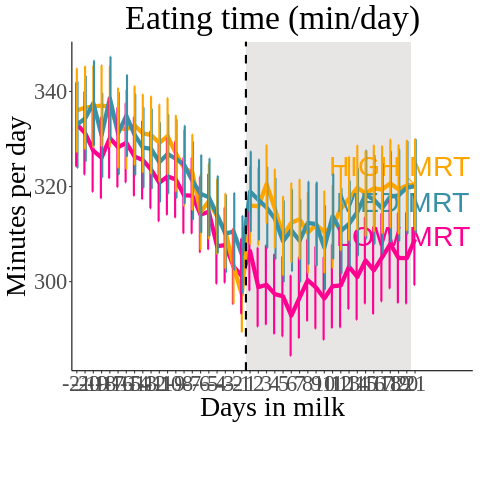

In [ ]:
%%R

p = dfLMSs %>% inner_join(Significance) %>%  mutate(label = if_else(DaysInMilk == max(as.numeric(DaysInMilk)), as.character(MRTQuantile), NA_character_),
                                                    significance = case_when(
                                                        `LOW - HIGH` == "Significant" ~ "Significant",
                                                        `LOW - MED` == "Significant" ~ "Significant",
                                                        `HIGH - MED` == "Significant" ~ "Significant",
                                                        TRUE ~ "Not-Significant"
                                                    )) %>%
  ggplot(
  aes(
    x=DaysInMilk,
    y=emmean,
    group=MRTQuantile,
    color=MRTQuantile)
    ) +
    scale_color_manual(values=group.colors)+
    scale_fill_manual(values=group.colors)+
    scale_alpha_manual(values = c("Not-Significant"=0,"Significant"=0.05))+ # transparency significance rectangles
    geom_rect(aes(xmin=as.numeric(DaysInMilk)-0.5, xmax =as.numeric(DaysInMilk)+0.5,ymin=-Inf,ymax=Inf,fill =significance ,alpha = significance),color = NA )+
    geom_line(size=2) +
    geom_text_repel(data= subset(dfLMSs,DaysInMilk == 21), aes(label = MRTQuantile, colour = MRTQuantile, x = 42, y= emmean),hjust = -0.8, size = 10, nudge_x =7,box.padding = 0.5,direction = "y")+
    geom_errorbar(
    aes(ymin=asymp.LCL,
        ymax=asymp.UCL),
    width=0.25,
    size=1,
    position=position_dodge(0.25)) +
  labs(
    title = "Eating time (min/day)",
    y="Minutes per day" ,
    x = "Days in milk") +
  theme_bw() +
  theme(text = element_text(family = "Times New Roman"),plot.margin = unit(c(0.5,0.5,4,0.5), "lines")) +
  theme(text=element_text(size=28),
        plot.title = element_text(hjust = 0.5),
        panel.border = element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.line = element_line(colour = "black"))+
  theme (legend.position= "none")+
  geom_vline(xintercept = myLoc, size = 1, linetype= "dashed", color ="black")



gt <- ggplotGrob(p)
gt$layout$clip[gt$layout$name == "panel"] <- "off"
grid.draw(gt)


In [ ]:
%%R
ggsave(plot = gt,"/content/drive/Shareddrives/Bovi-Analytics/Projects/CelienKemel/Figures/EatingTimeMRTQuantileByDaysInMilk.png", width = 24, height = 8)

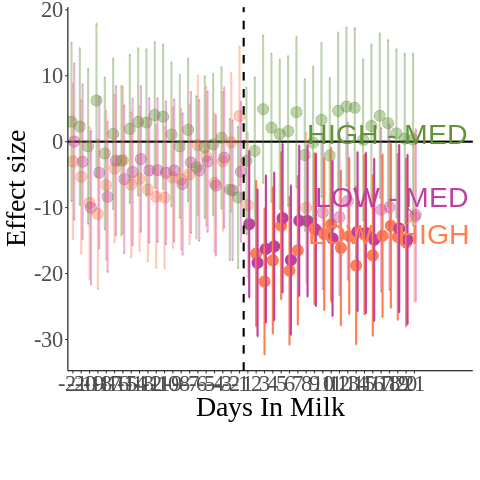

In [ ]:
%%R

myLoc <-
  (which(levels(dfLMSs$DaysInMilk) == "-1") +
     which(levels(dfLMSs$DaysInMilk) == "1")) /
  2

group.colors<-c("HIGH - MED"="#609436", "LOW - MED"="#C040A0", "LOW - HIGH"="#FF7F50","Significant"="#171710")
plotEffectSize <- dfConfInts %>%
  ggplot(
  aes(
    x=DaysInMilk,
    y=estimate,color = contrast)
    ) +
    scale_color_manual(values = group.colors)+
    scale_fill_manual(values = group.colors)+
  geom_hline(yintercept=0, color= "black", size=1) +
  scale_alpha_manual(values = c("Not-Significant"=0.4,"Significant"=1))+ # transparency significance each group
  geom_point(aes(alpha = significance),size=5,position=position_dodge(0.5)) +
  geom_errorbar(
    aes(ymin=asymp.LCL,
        ymax=asymp.UCL,
        alpha = significance),
    position=position_dodge(0.5),
    width=0.5,
    size=1) +
  geom_text_repel(data= subset(dfConfInts,DaysInMilk == 21), aes(label = contrast, colour = contrast, x = 42, y= estimate),hjust = -0.8, size = 10, nudge_x =7,box.padding = 0.5,direction = "y") +
  labs(
    y="Effect size" ,
    x = "Days In Milk") +
  theme_bw() +
  theme(text = element_text(family = "Times New Roman",size =28),
        plot.title = element_blank(),
        panel.border = element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.line = element_line(colour = "black"),
        legend.position="none",
        legend.title = element_blank(),
        plot.margin = unit(c(0.5,0.5,4,0.5), "lines"))+
  geom_vline(xintercept = myLoc, size = 1, linetype= "dashed", color ="black")

plotEffectSize

In [ ]:
%%R
ggsave(plot = plotEffectSize,"/content/drive/Shareddrives/Bovi-Analytics/Projects/CelienKemel/Figures/EatingTimeMRTQuantileByDaysInMilkeffectPlot.png", width = 24, height = 6)

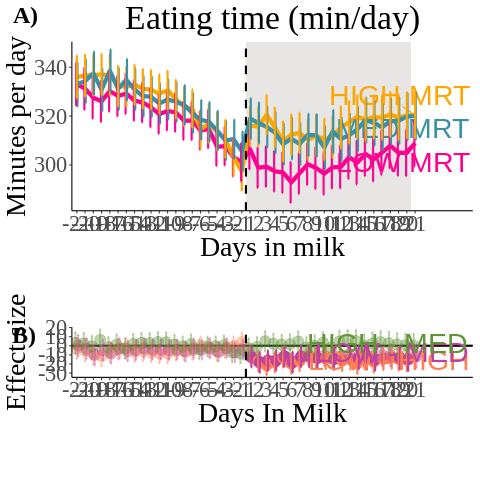

In [ ]:
%%R
combinedPlot <- ggarrange(
    gt,
    plotEffectSize,
    heights = c(2, 1),
    labels = c("A)","B)"),
    ncol = 1,
    nrow = 2,
    align ="v",font.label=list(family = "Times New Roman",size=24))


    combinedPlot

In [ ]:
%%R
ggsave(plot = combinedPlot,"/content/drive/Shareddrives/Bovi-Analytics/Projects/CelienKemel/Figures/EatingTimeMRTQuantileByDaysInMilkCombo.png", width = 24, height = 14)